In [3]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl
import seaborn.apionly as sns
# from corner import corner
from scipy.misc import logsumexp
import pcmdpy as ppy
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl


GPU acceleration enabled


Message: trial mode expires in 29 days


In [4]:
ppy.gpu_utils.initialize_gpu(0)

using given n: 0
Starting SourceModule Code
Getting function
Past the SourceModule code
CUDAC Available


In [5]:
sns.set_context('poster')

In [6]:
dfs = {}
for i in range(1, 15):
    try:
        dfs[i] = pd.read_csv('results/dynesty_{:d}.csv'.format(i))
    except:
        dfs[i] = pd.read_csv('results/dynesty_{:d}.csv'.format(i), compression='gzip')

In [7]:
for i in range(1, 5):
    j = i + 14
    try:
        dfs[j] = pd.read_csv('results/datatest_{:d}.csv'.format(i))
    except:
        dfs[j] = pd.read_csv('results/datatest_{:d}.csv'.format(i), compression='gzip')

In [8]:
for df in dfs.values():
    df['log_weights'] = df.logwt.values - logsumexp(df.logwt.values)
    df['weights'] = np.exp(df['log_weights'])

In [9]:
for i in range(13, 15):
    df = dfs[i]
    df.logNpix = np.log10(np.sum(10.**df[['logSFH0','logSFH1','logSFH2','logSFH3','logSFH4','logSFH5','logSFH6']].values, axis=1))

In [10]:
def plot_chains_tau(df, truths=None, axes=None, title=None):
    if axes is None:
        fig, axes = plt.subplots(nrows=4, figsize=(8, 10), sharex=True)
    axes[0].plot(df.logzh)
    axes[0].set_ylabel('[Fe/H]')
    axes[1].plot(df.logdust)
    axes[1].set_ylabel('log E(B-V)')
    axes[2].plot(df.logNpix)
    axes[2].set_ylabel('log Npix')
    axes[3].plot(df.tau)
    axes[3].set_ylabel(r'$\tau$ (Gyr)')
    axes[3].set_xlabel('Iteration')
    if truths is not None:
        for i in range(4):
            axes[i].axhline(y=truths[i], color='r', ls='--')
    if title is not None:
        not_finished = np.all(np.diff(df.ncall.values) >= 0)
        if not_finished:
            nc = int(df.ncall.values[-1])
        else:
            nc = int(df.ncall.sum())
        title += ' {:d} calls'.format(nc)
        axes[0].set_title(title)
    return axes

In [11]:
def plot_chains_SSP(df, truths=None, axes=None, title=None):
    if axes is None:
        fig, axes = plt.subplots(nrows=4, figsize=(8, 10), sharex=True)
    axes[0].plot(df.logzh)
    axes[0].set_ylabel('[Fe/H]')
    axes[1].plot(df.logdust)
    axes[1].set_ylabel('log E(B-V)')
    axes[2].plot(df.logNpix)
    axes[2].set_ylabel('log Npix')
    axes[3].plot(df.logage)
    axes[3].set_ylabel('log age (yr)')
    axes[3].set_xlabel('Iteration')
    if truths is not None:
        for i in range(4):
            axes[i].axhline(y=truths[i], color='r', ls='--')
    if title is not None:
        not_finished = np.all(np.diff(df.ncall.values) >= 0)
        if not_finished:
            nc = int(df.ncall.values[-1])
        else:
            nc = int(df.ncall.sum())
        title += ' {:d} calls'.format(nc)
        axes[0].set_title(title)
    return axes

In [12]:
def plot_chains_const(df, truths=None, axes=None, title=None):
    if axes is None:
        fig, axes = plt.subplots(nrows=3, figsize=(8, 8), sharex=True)
    axes[0].plot(df.logzh)
    axes[0].set_ylabel('[Fe/H]')
    axes[1].plot(df.logdust)
    axes[1].set_ylabel('log E(B-V)')
    axes[2].plot(df.logNpix)
    axes[2].set_ylabel('log Npix')
    axes[2].set_xlabel('Iteration')
    if truths is not None:
        for i in range(3):
            axes[i].axhline(y=truths[i], color='r', ls='--')
    if title is not None:
        not_finished = np.all(np.diff(df.ncall.values) >= 0)
        if not_finished:
            nc = int(df.ncall.values[-1])
        else:
            nc = int(df.ncall.sum())
        title += ' {:d} calls'.format(nc)
        axes[0].set_title(title)
    return axes

In [13]:
def plot_chains_full(df, truths=None, axes=None, title=None):
    if axes is None:
        fig, axes = plt.subplots(nrows=10, figsize=(8, 16), sharex=True)
    axes[0].plot(df.logzh)
    axes[0].set_ylabel('[Fe/H]')
    axes[1].plot(df.logdust)
    axes[1].set_ylabel('log E(B-V)')
    for i in range(7):
        colname = 'logSFH{:d}'.format(i)
        axes[i+2].plot(df[colname])
        axes[i+2].set_ylabel(colname)
    axes[-1].plot(df.logNpix)
    axes[-1].set_xlabel('Iteration')
    axes[-1].set_ylabel('log Npix')
    if truths is not None:
        for i in range(10):
            axes[i].axhline(y=truths[i], color='r', ls='--')
    if title is not None:
        not_finished = np.all(np.diff(df.ncall.values) >= 0)
        if not_finished:
            nc = int(df.ncall.values[-1])
        else:
            nc = int(df.ncall.sum())
        title += ' {:d} calls'.format(nc)
        axes[0].set_title(title)
    return axes

In [14]:
def plot_chains(df, **kwargs):
    if 'tau' in df.columns:
        return plot_chains_tau(df, **kwargs)
    elif 'logSFH0' in df.columns:
        return plot_chains_full(df, **kwargs)
    elif 'logage' in df.columns:
        return plot_chains_SSP(df, **kwargs)
    else:
        return plot_chains_const(df, **kwargs)

| Dyn Run | Nim | Npoints | Gal    | LikeMode|
|---------|-----|---------|--------|---------| 
| 1       | 256 | 50      | const  | binned  | 
| 2       | 1024| 50      | const  | binned  | 
| 3       | 256 | 50      | tau    | binned  | 
| 4       | 1024| 50      | tau    | binned  | 
| 5       | 256 | 50      | const  | Gauss   | 
| 6       | 1024| 50      | const  | Gauss   | 
| 7       | 256 | 50      | tau    | Gauss   | 
| 8       | 1024| 50      | tau    | Gauss   | 
| 9       | 256 | 200     | tau    | binned  | 
| 10      | 1024| 200     | tau    | binned  | 
| 11      | 256 | 200     | tau    | Gauss   | 
| 12      | 1024| 200     | tau    | Gauss   | 
| 13      | 256 | 50      | full   | binned  |
| 14      | 1024| 50      | full   | binned  |
| 15      | 1024| 50      |M31BULGE| binned  | 
| 16      | 1024| 50      |M31BULGE| Gauss   | 
| 17      | 1024| 50      |M31 DISK| binned  |
| 18      | 1024| 50      |M31 DISK| Gauss   |


In [15]:
titles = {}
titles[1] = 'Run 1 (Const, Binned, 256, 50pts)'
titles[2] = 'Run 2 (Const, Binned, 1024, 50pts)'
titles[3] = 'Run 3 (Tau, Binned, 256, 50pts)'
titles[4] = 'Run 4 (Tau, Binned, 1024, 50pts)'
titles[5] = 'Run 5 (Const, Gauss, 256, 50pts)'
titles[6] = 'Run 6 (Const, Gauss, 1024, 50pts)'
titles[7] = 'Run 7 (Tau, Gauss, 256, 50pts)'
titles[8] = 'Run 8 (Tau, Gauss, 1024, 50pts)'
titles[9] = 'Run 9 (Tau, Binned, 256, 200pts)'
titles[10] = 'Run 10 (Tau, Binned, 1024, 200pts)'
titles[11] = 'Run 11 (Tau, Gauss, 256, 200pts)'
titles[12] = 'Run 12 (Tau, Gauss, 1024, 200pts)'
titles[13] = 'Run 13 (Full, Binned, 256, 50pts)'
titles[14] = 'Run 14 (Full, Binned 1024, 50pts)'
titles[15] = 'M31 Bulge (Tau, Binned, 1024, 50pts)'
titles[16] = 'M31 Bulge (Tau, Gauss, 1024, 50pts)'
titles[17] = 'M31 Disk (Tau, Binned, 1024, 50pts)'
titles[18] = 'M31 Disk (Tau, Gauss, 1024, 50pts)'

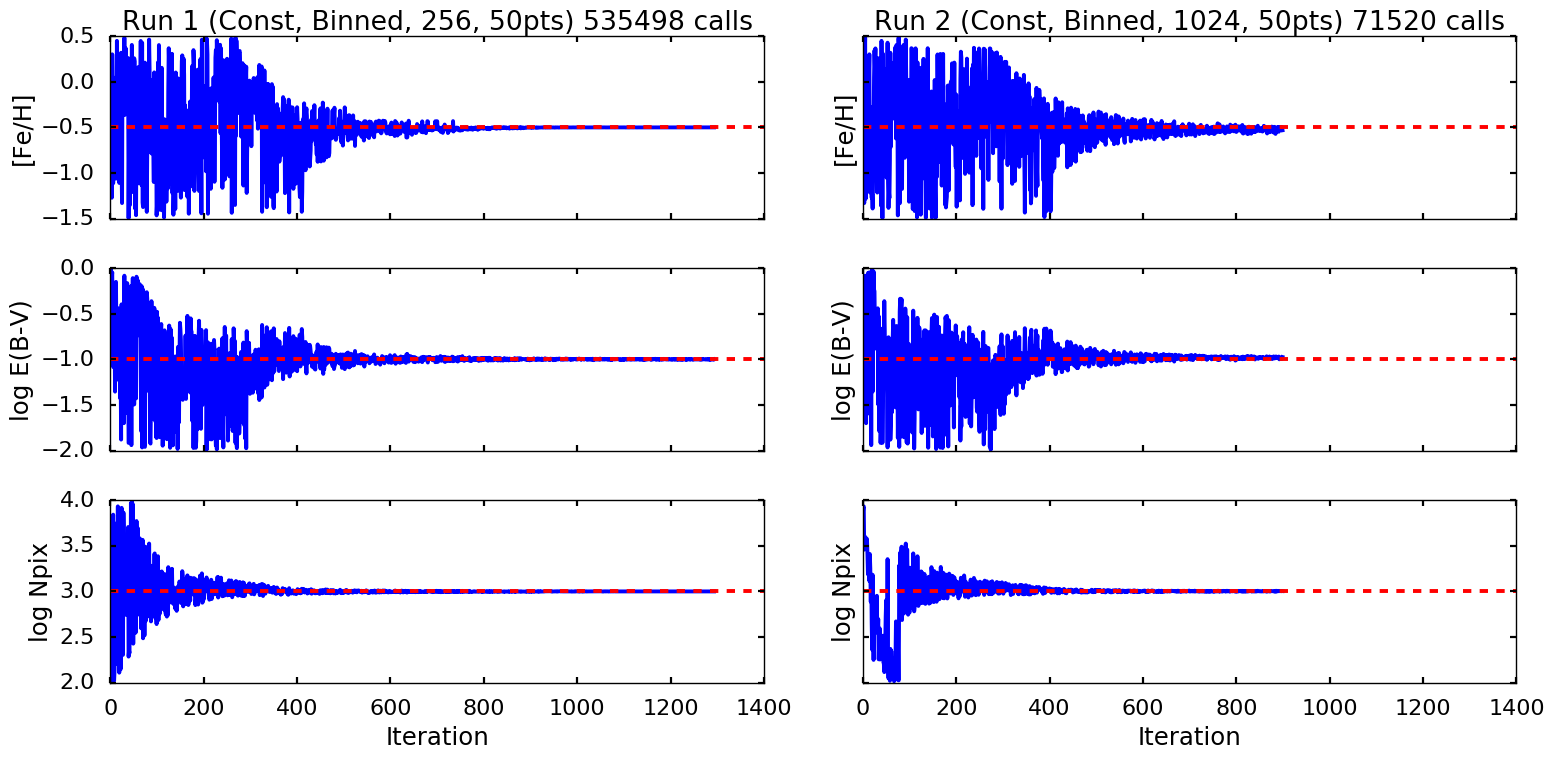

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 8), sharex=True, sharey='row')
plot_chains(dfs[1], truths=[-0.5, -1., 3.], axes=axes[:,0], title=titles[1])
plot_chains(dfs[2], truths=[-0.5, -1., 3.], axes=axes[:,1], title=titles[2])
plt.tight_layout()

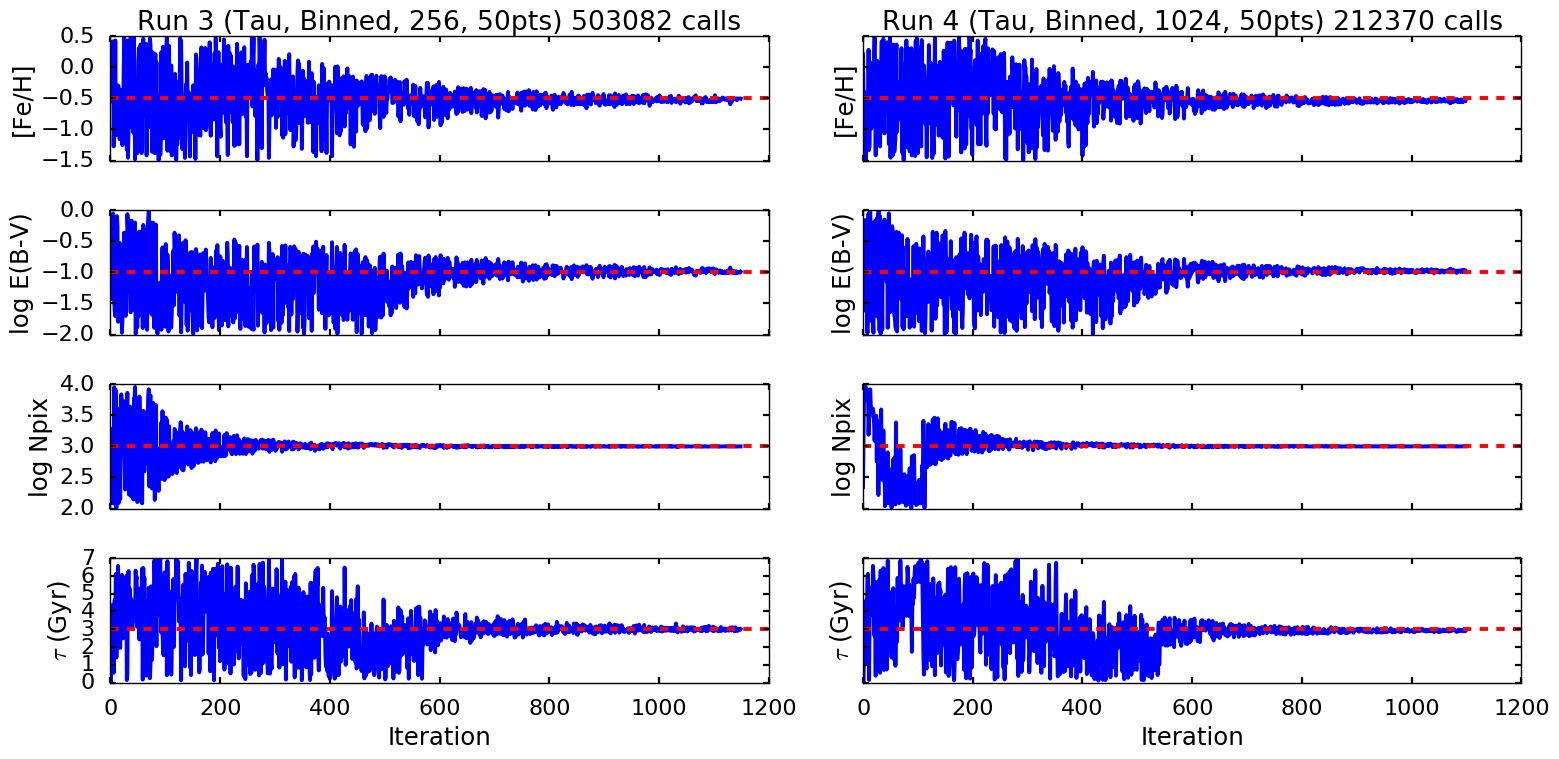

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 8), sharex=True, sharey='row')
plot_chains(dfs[3], truths=[-0.5, -1., 3., 3.], axes=axes[:,0], title=titles[3])
plot_chains(dfs[4], truths=[-0.5, -1., 3., 3.], axes=axes[:,1], title=titles[4])
plt.tight_layout()

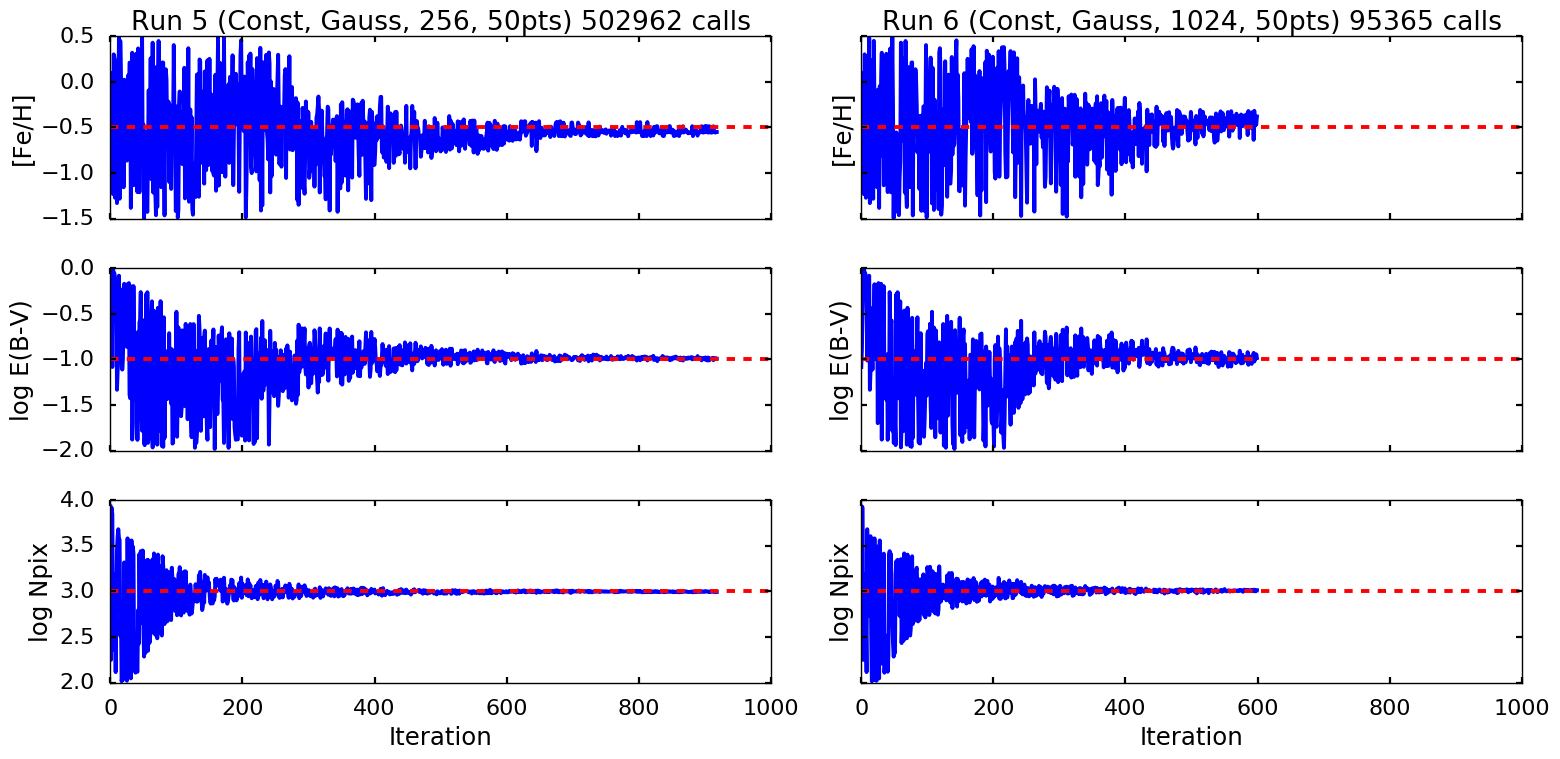

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 8), sharex=True, sharey='row')
plot_chains(dfs[5], truths=[-0.5, -1., 3.], axes=axes[:,0], title=titles[5])
plot_chains(dfs[6], truths=[-0.5, -1., 3.], axes=axes[:,1], title=titles[6])
plt.tight_layout()

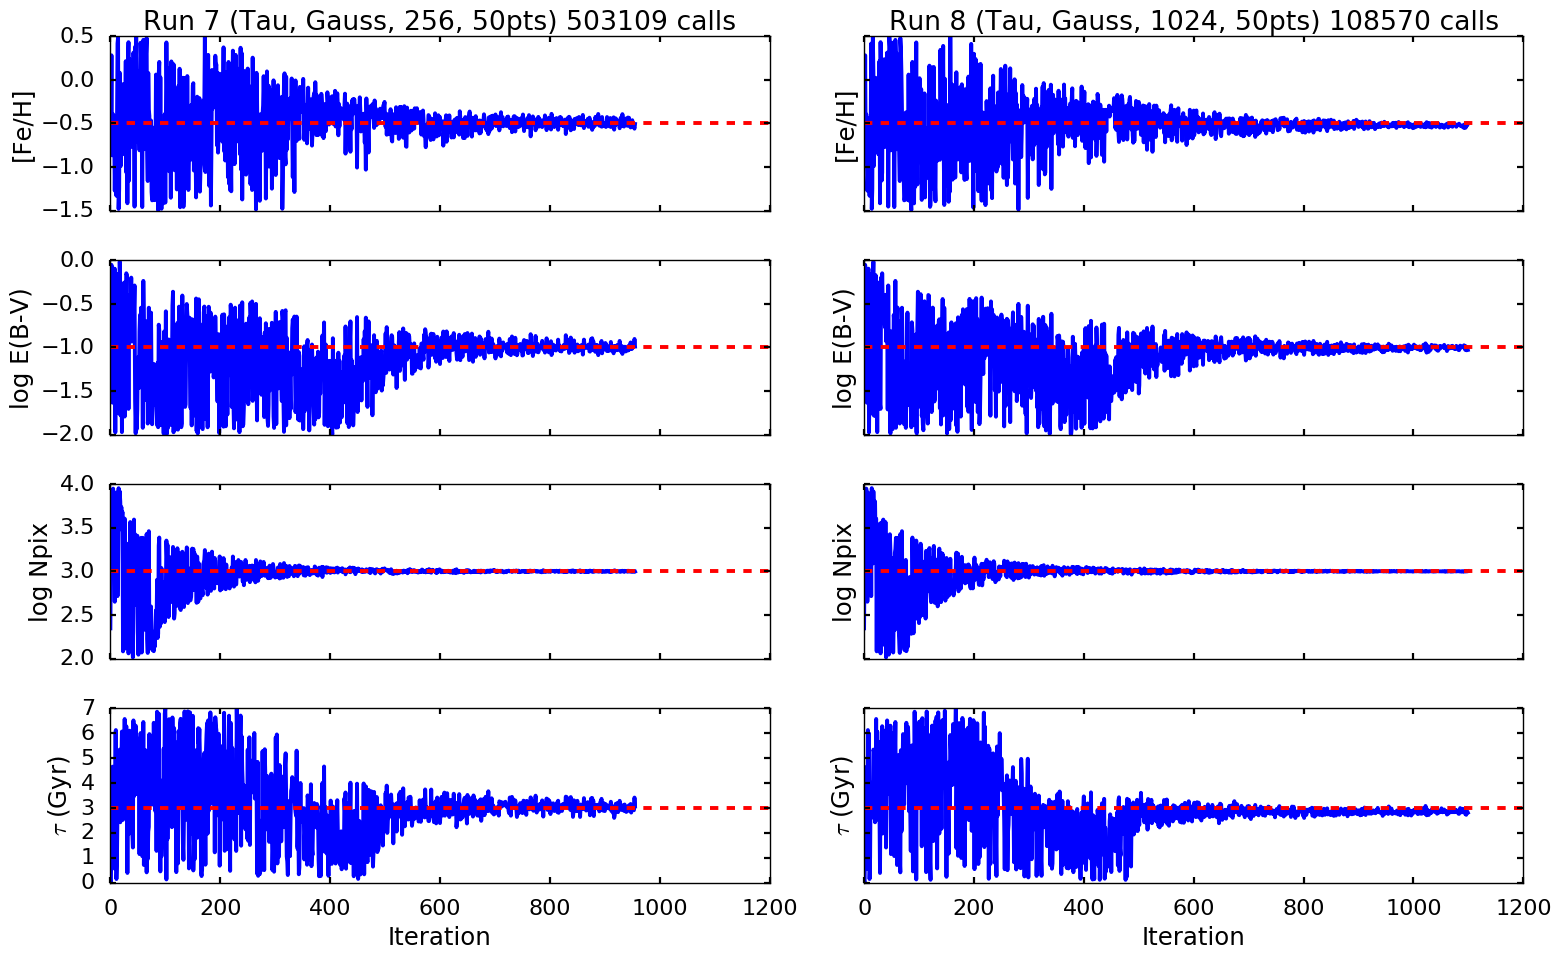

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 10), sharex=True, sharey='row')
plot_chains(dfs[7], truths=[-0.5, -1., 3., 3.], axes=axes[:,0], title=titles[7])
plot_chains(dfs[8], truths=[-0.5, -1., 3., 3.], axes=axes[:,1], title=titles[8])
plt.tight_layout()

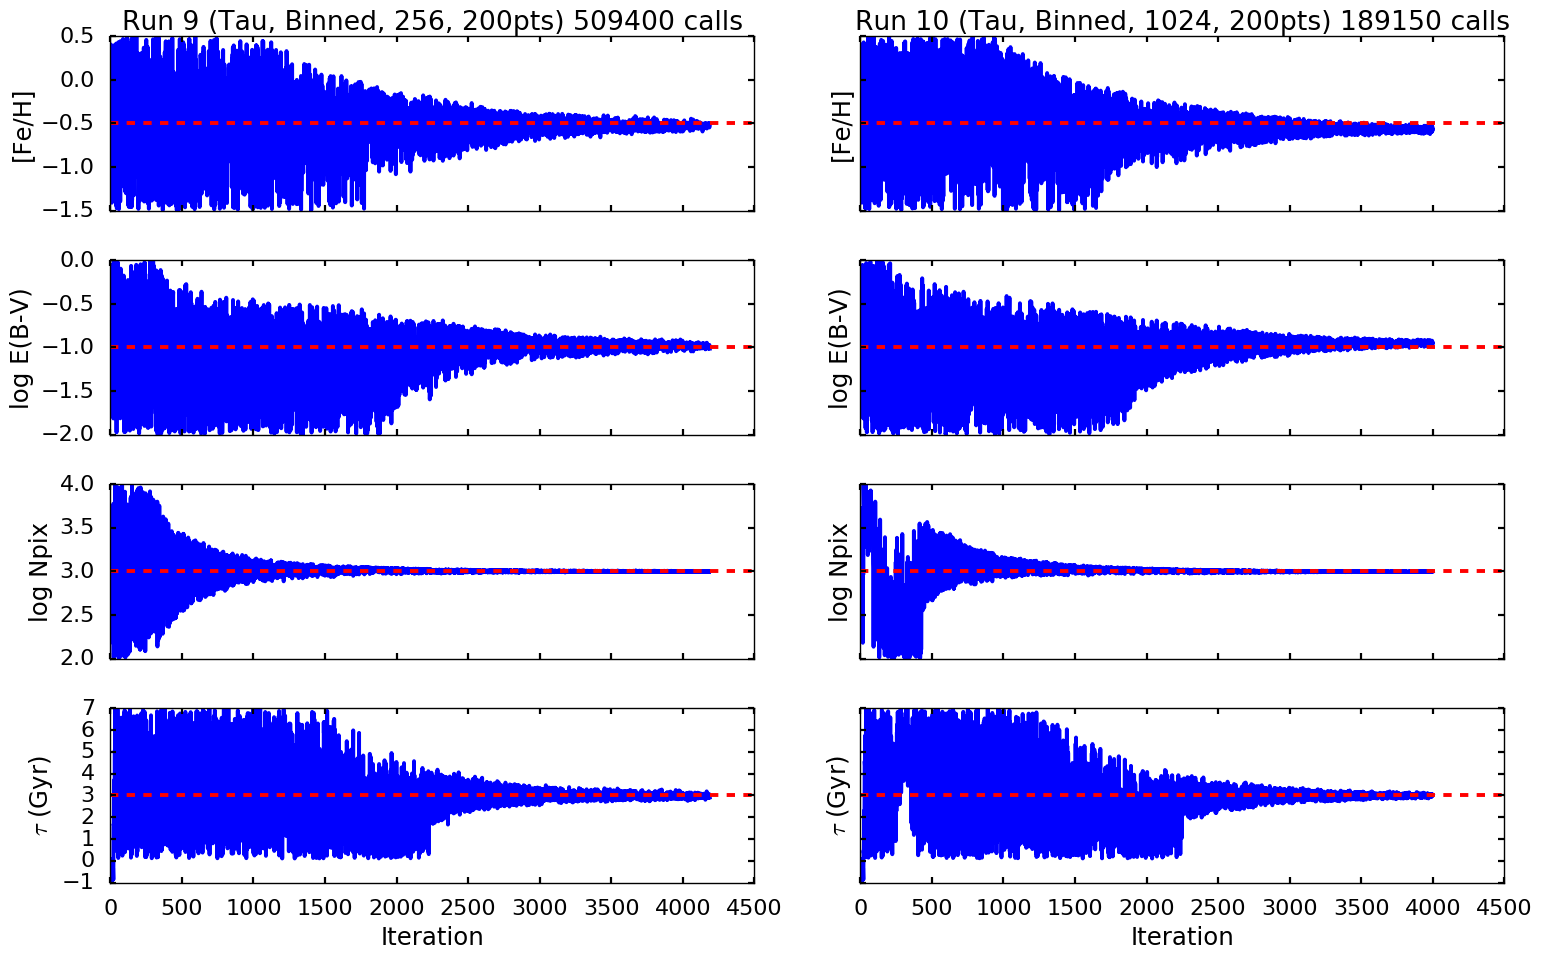

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 10), sharex=True, sharey='row')
plot_chains(dfs[9], truths=[-0.5, -1., 3., 3.], axes=axes[:,0], title=titles[9])
plot_chains(dfs[10], truths=[-0.5, -1., 3., 3.], axes=axes[:,1], title=titles[10])
plt.tight_layout()

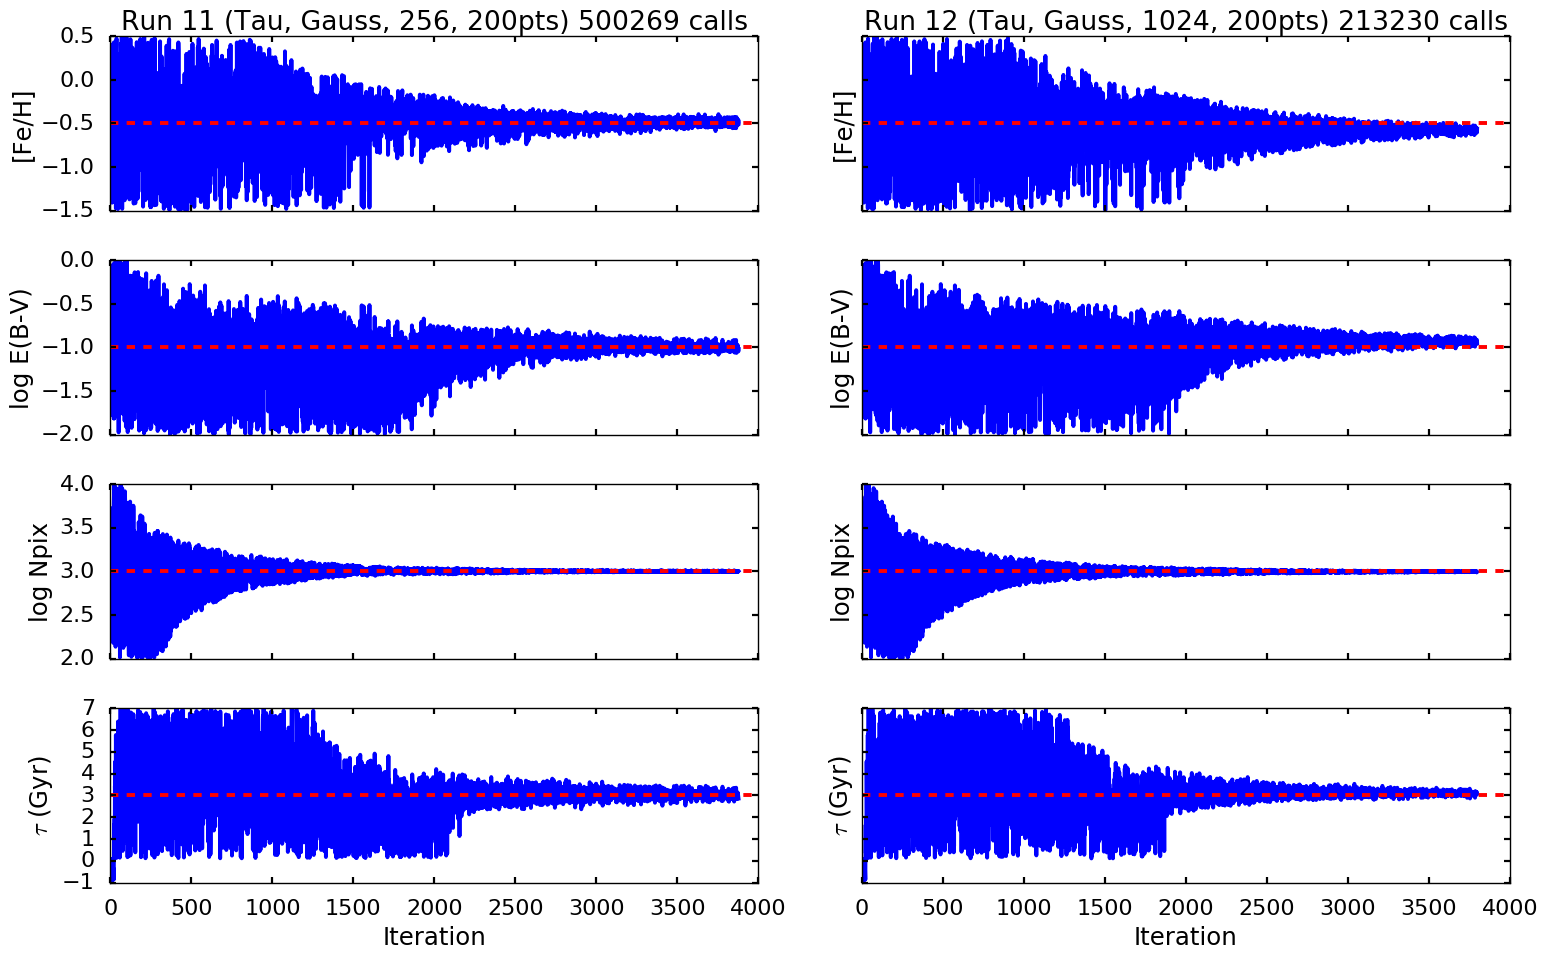

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 10), sharex=True, sharey='row')
plot_chains(dfs[11], truths=[-0.5, -1., 3., 3.], axes=axes[:,0], title=titles[11])
plot_chains(dfs[12], truths=[-0.5, -1., 3., 3.], axes=axes[:,1], title=titles[12])
plt.tight_layout()

In [20]:
model = ppy.galaxy.Tau_Model(np.array([-0.5, -1., 3., 3.]))

In [21]:
params = np.append(model._params[:-2], np.log10(model.SFH))
params = np.append(params, 3.)

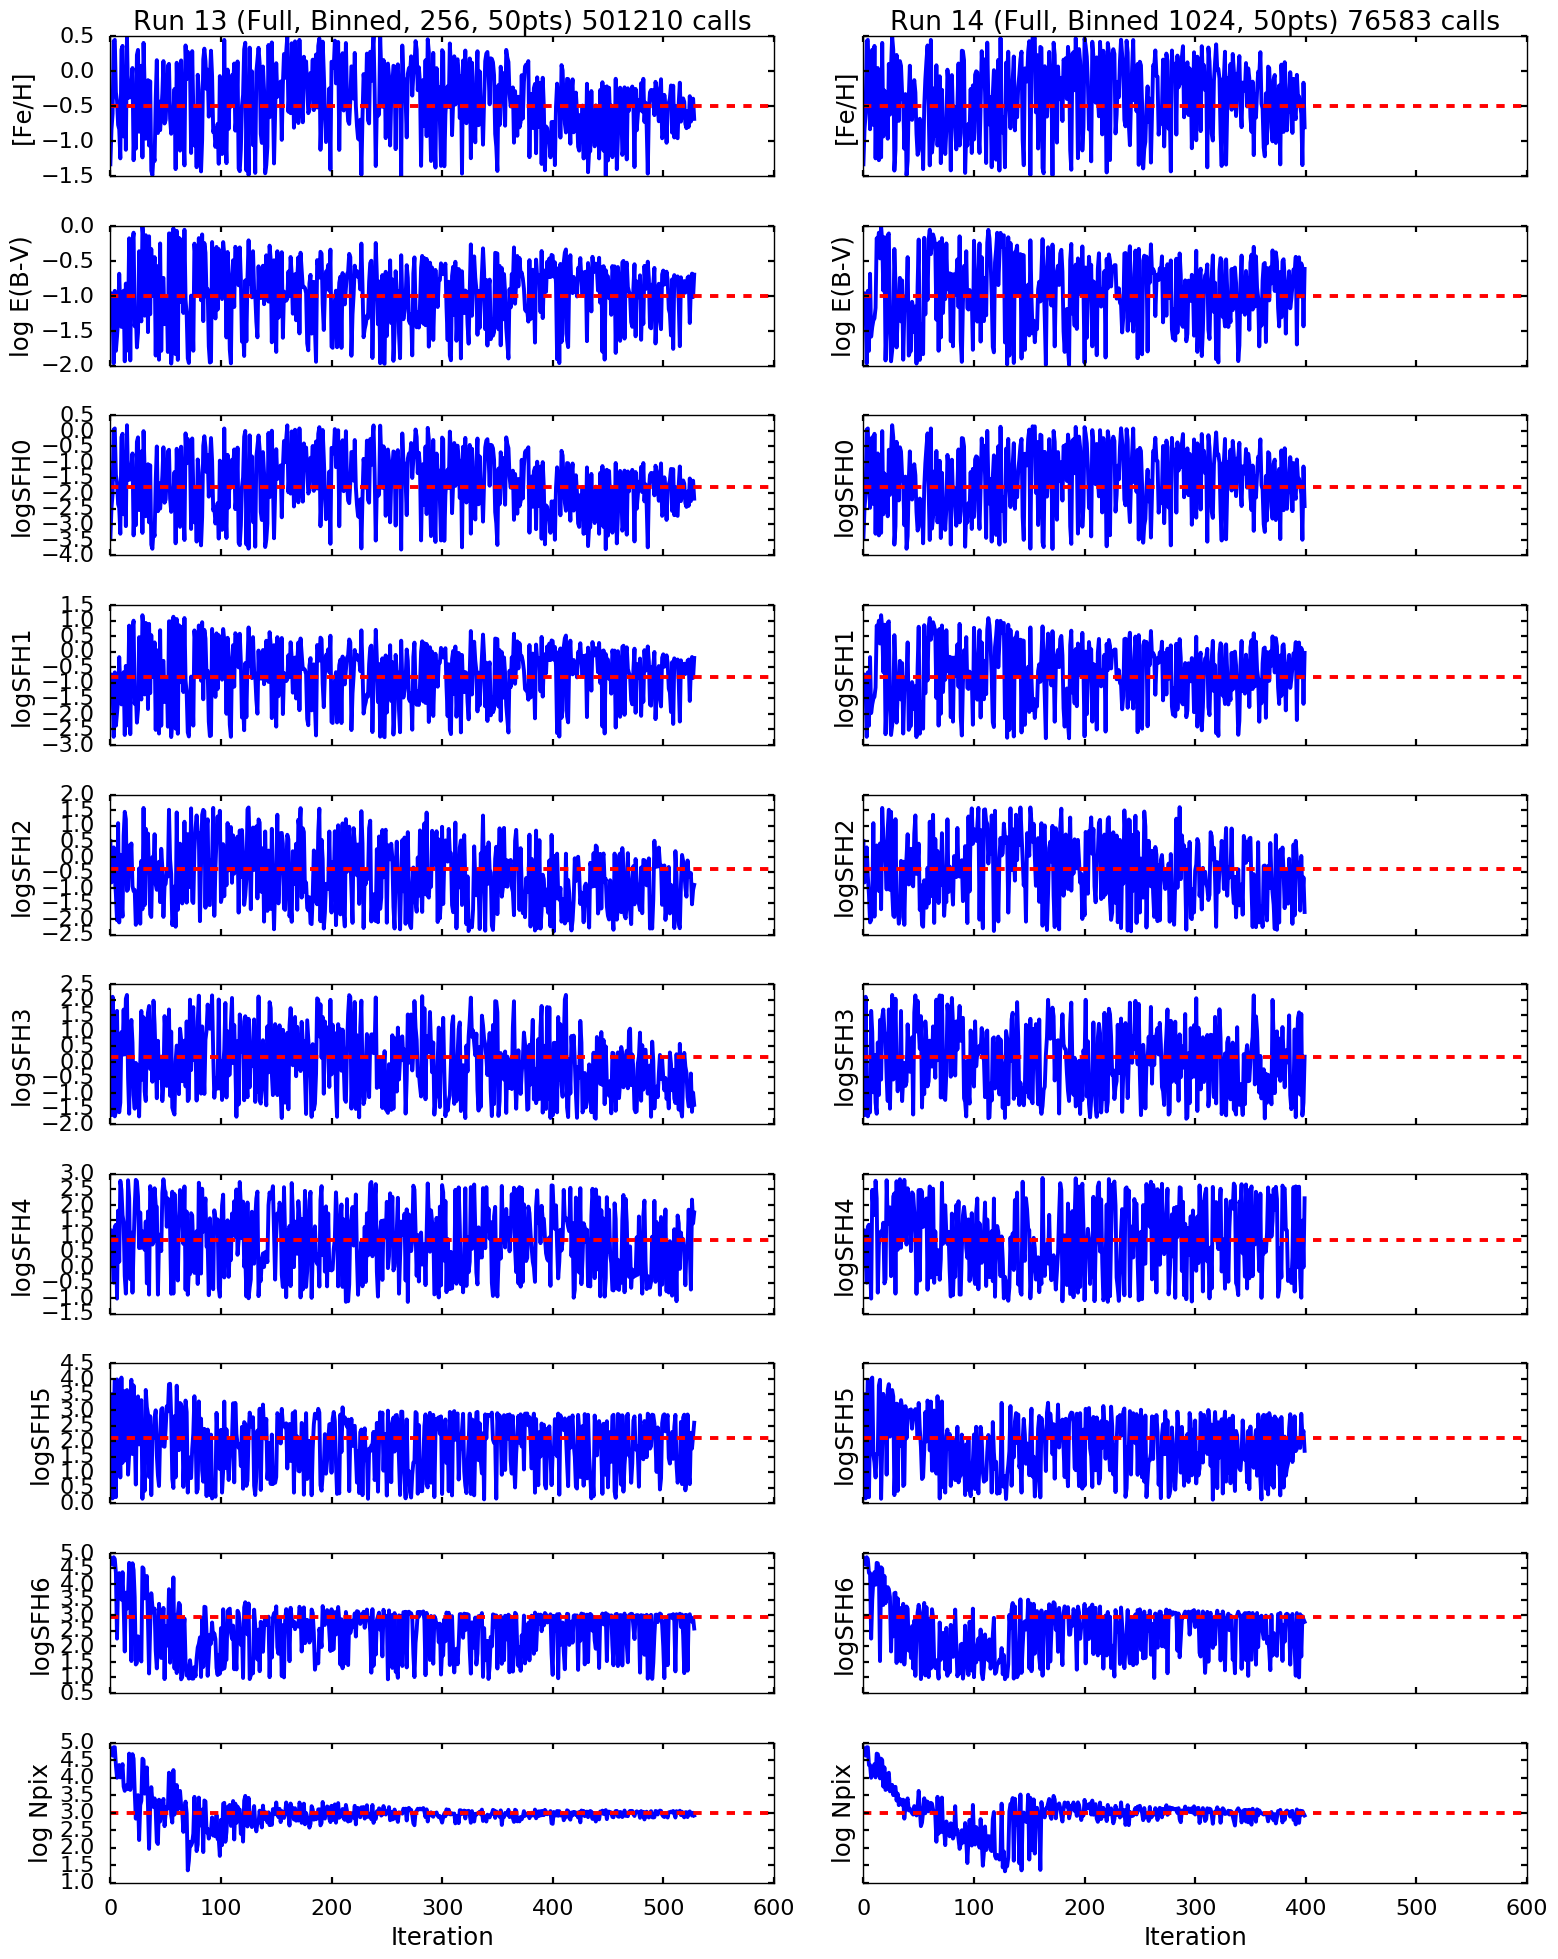

In [22]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(16, 20), sharex=True, sharey='row')
plot_chains(dfs[13], truths=params, axes=axes[:,0], title=titles[13])
plot_chains(dfs[14], truths=params, axes=axes[:,1], title=titles[14])
plt.tight_layout()

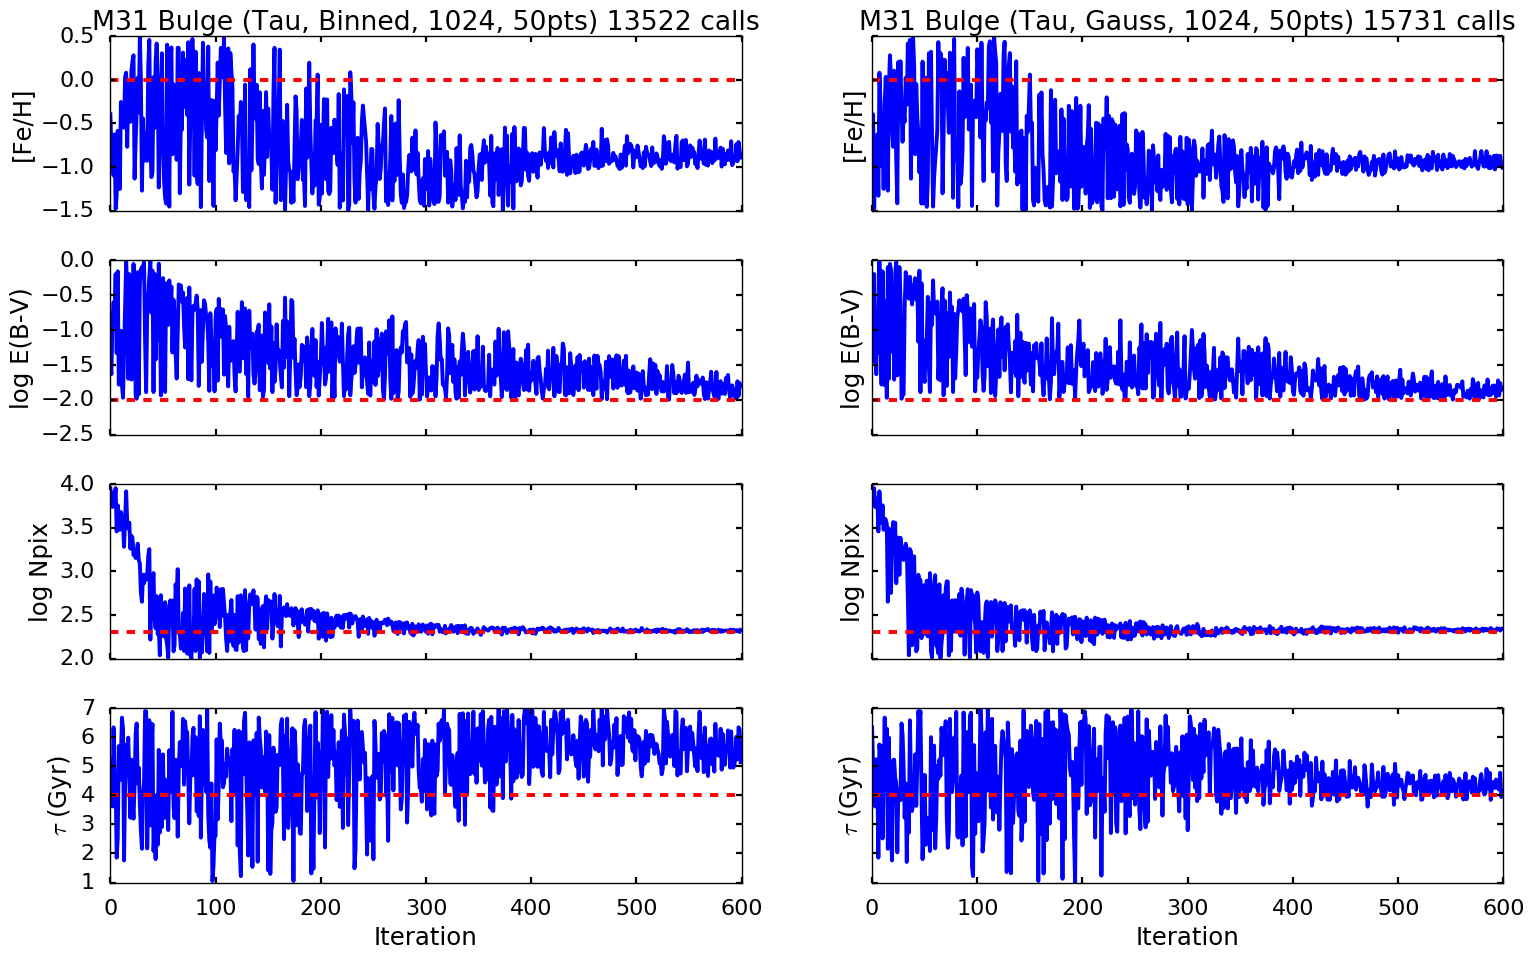

In [16]:
params = np.array([0., -2., 2.3, 4.])

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 10), sharex=True, sharey='row')
plot_chains(dfs[15], truths=params, axes=axes[:,0], title=titles[15])
plot_chains(dfs[16], truths=params, axes=axes[:,1], title=titles[16])
plt.tight_layout()

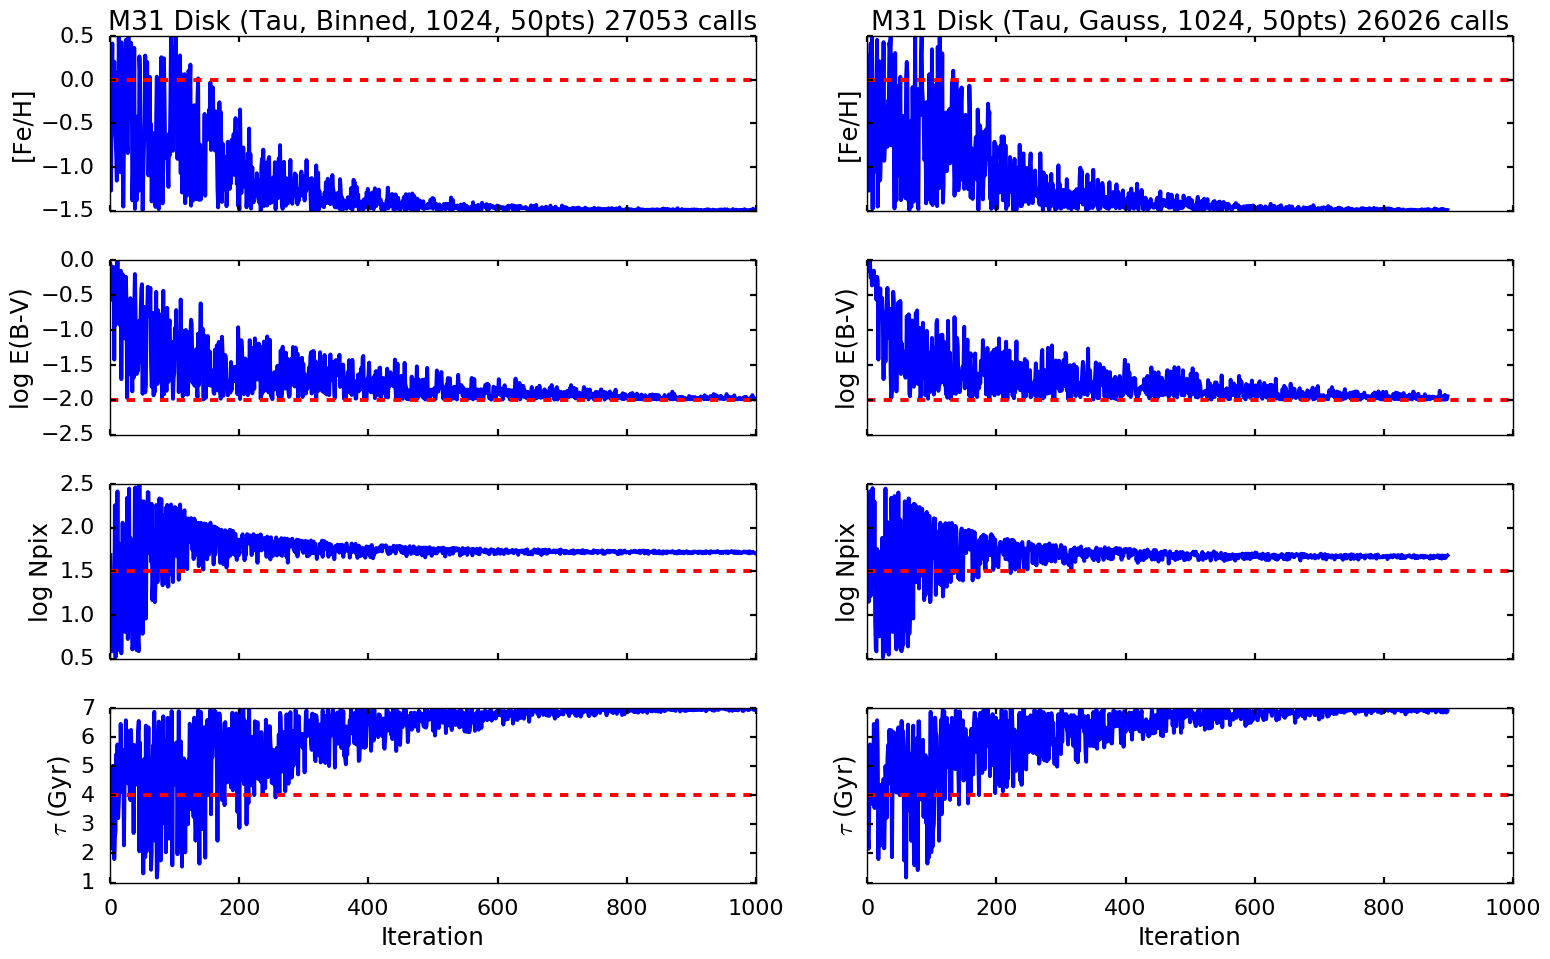

In [17]:
params = np.array([0., -2., 1.5, 4.])

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 10), sharex=True, sharey='row')
plot_chains(dfs[17], truths=params, axes=axes[:,0], title=titles[17])
plot_chains(dfs[18], truths=params, axes=axes[:,1], title=titles[18])
plt.tight_layout()

In [38]:
pcmd_disk = np.loadtxt('../data/m31_b06-263.dat', unpack=True)

In [39]:
pcmd_disk

array([[ 0.722998,  0.794544,  0.681635, ...,  0.850231,  0.900774,
         0.843838],
       [ 2.87926 ,  3.08465 ,  2.59377 , ...,  3.061   ,  3.00865 ,
         2.87643 ]])

In [19]:
dmod = 24.47
d_mpc = 10.**((dmod - 25.)/5.)
print(d_mpc)
filters = [ppy.instrument.Filter.HST_F475W(d_mpc), ppy.instrument.Filter.HST_F814W(d_mpc)]
iso_model = ppy.isochrones.Isochrone_Model(filters)
driver = ppy.driver.Driver(iso_model, gpu=True)

0.783429642766


In [20]:
params = np.array([-1.5, -2., 1.8, 7.])
gal = ppy.galaxy.Tau_Model(params)

In [60]:
mags, _ = driver.simulate(gal, 1024)
pcmd_model = ppy.utils.make_pcmd(mags)

In [61]:
ssp = ppy.galaxy.Galaxy_SSP(np.array([0., -2., 3., 10.]))

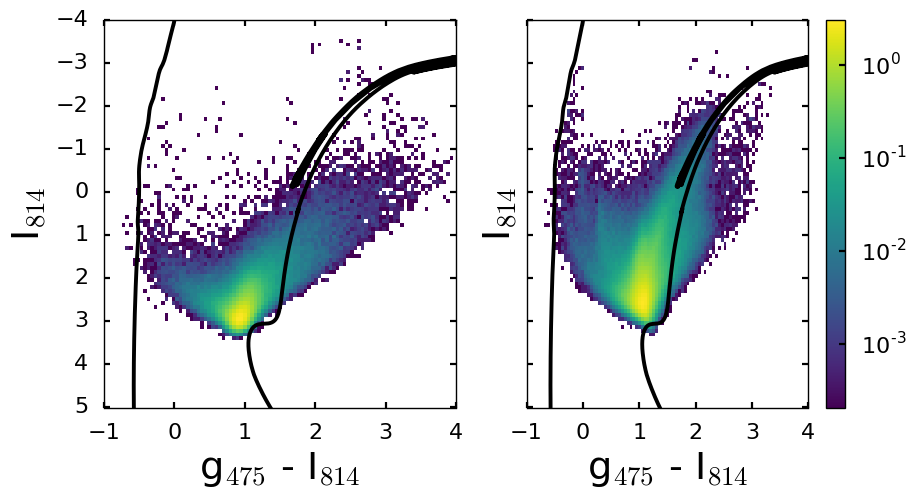

In [100]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5), sharex=True, sharey=True)
nbins = 100
bins=[np.linspace(-1, 4, nbins), np.linspace(-4, 5, nbins)]
axes[0].hist2d(pcmd_disk[0], pcmd_disk[1], bins=bins, norm=mpl.colors.LogNorm(), normed=True, cmap='viridis')
plt.subplot(axes[1])
plt.hist2d(pcmd_model[0], pcmd_model[1], bins=bins, norm=mpl.colors.LogNorm(), normed=True,cmap='viridis')
plt.colorbar()
axes[0].set_ylim([5, -4]), axes[1].set_xlim([-1, 4])
iso_model.plot_isochrone(ssp, ax=axes[0])
iso_model.plot_isochrone(ssp, ax=axes[1])


In [91]:
nd = pcmd_disk.shape[1]
nm = pcmd_model.shape[1]

In [94]:
ratio = float(nm)/nd

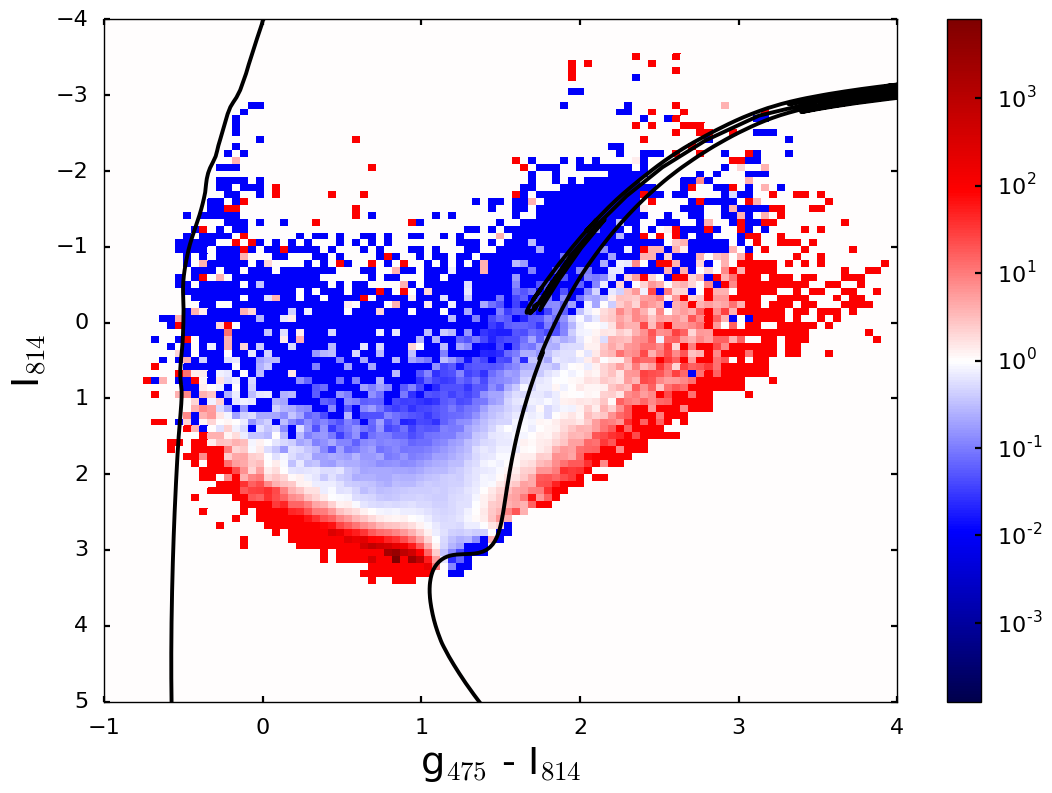

In [97]:
fig, ax = plt.subplots()
nbins = 100
bins=[np.linspace(-1, 4, nbins), np.linspace(-4, 5, nbins)]
h_disk, _, _ = np.histogram2d(pcmd_disk[0], pcmd_disk[1], bins=bins)
h_mod, _, _ = np.histogram2d(pcmd_model[0], pcmd_model[1], bins=bins)
# res_disk = ax.hist2d(pcmd_disk[0], pcmd_disk[1], bins=100, norm=mpl.colors.LogNorm(), alpha=0.)
# res_mod = ax.hist2d(pcmd_model[0], pcmd_model[1], bins=100, norm=mpl.colors.LogNorm(), alpha=0.)
h = h_disk * ratio / h_mod
h[np.isnan(h)] = 1.
h[np.isinf(h)] = 1e2
h[h==0] = 1e-2
plt.subplot(ax)
vm = np.max(np.abs(np.log10(h)))
plt.pcolormesh(bins[0], bins[1], h.T, norm=mpl.colors.LogNorm(vmin=10.**(-vm), vmax=10.**(vm)), cmap='seismic')
ax.set_ylim([5, -4]), ax.set_xlim([-1, 4])
iso_model.plot_isochrone(ssp, ax=ax)
plt.colorbar()

In [53]:
sorted(np.unique(h.flatten()))[::-1]

[inf,
 1421.4648504388874,
 1119.1760949045863,
 838.62382179164808,
 747.12839578544663,
 725.89741295527813,
 565.1485429554325,
 490.33460345864893,
 400.35567622603082,
 373.31144809712606,
 346.77271955941563,
 231.31661293059562,
 218.88132298721132,
 202.19983647779338,
 201.1888372954044,
 200.17783811301541,
 195.93164154698178,
 178.94685528284714,
 170.42557645985445,
 159.73787081745678,
 156.30047359733427,
 145.41538240027975,
 131.93539330176017,
 131.83429338352127,
 129.64120284941598,
 125.02689888876888,
 109.33234015263544,
 106.91316353763324,
 104.13291578606359,
 99.727847919940231,
 97.989151523853721,
 88.967928050229077,
 78.857936226339405,
 71.131013903795164,
 69.84319351670446,
 68.242444811255268,
 65.714946855282861,
 64.029948217967899,
 63.692948490504911,
 62.681949308115946,
 60.200405860433946,
 59.509503597860906,
 56.541065385457038,
 55.099455440198703,
 54.59395584900421,
 50.269126013229176,
 50.145559446492769,
 49.538959937059374,
 44.9674853